# Laboratorio #2
##Jhoan Londoño Restrepo
### Curso de aprendizaje estadístico

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statistics as stat

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm

#Generación de la data

Como primero generaremos 2 distribuciones de probabilidad centradas en 5.0, 7.5 con desviación estandar de 2.5 y 1.5 respectivamente

In [223]:
x_1 = stats.norm.rvs(loc=5, scale=2.5, size=1000, random_state=None)
x_2 = stats.norm.rvs(loc=7.5, scale=1.5, size=1000, random_state=None)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


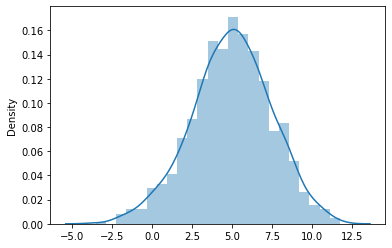

In [224]:
sns.distplot(x_1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


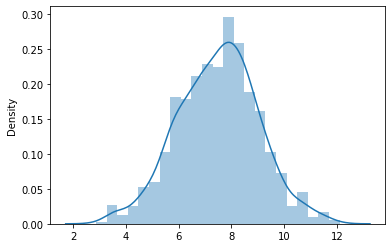

In [225]:
sns.distplot(x_2)

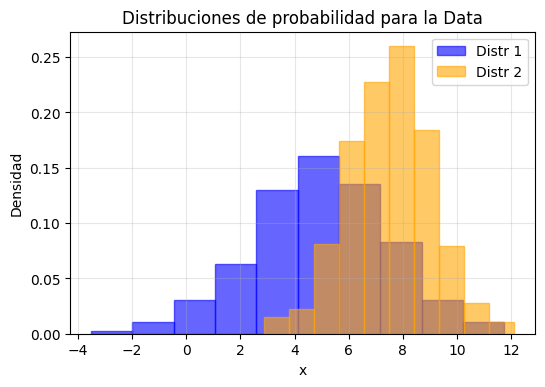

In [259]:
plt.figure(dpi=100)
n, bins, patches = plt.hist(x_1, 10, facecolor='b', ec="blue",alpha=0.6, density=True,label="Distr 1")
n, bins, patches = plt.hist(x_2, 10, facecolor='orange', ec="orange",alpha=0.6, density=True, label="Distr 2")
plt.title(f"Distribuciones de probabilidad para la Data")
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(alpha=0.3)

##Frontera analítica

In [252]:
def pdf(x, mean1 = 5, mean2=7.5, desv1=2.5, desv2=1.5):
  f1 = stats.norm(loc = mean1, scale = desv1)
  f2 = stats.norm(loc = mean2, scale = desv2)
  return "Done", f1, f2
x=np.linspace(2, 12,100)
_, f1, f2 = pdf(x, mean1 = 5, mean2 = 7.5, desv1 = 2.5, desv2 = 1.5)
#Determinemos el minimo

In [237]:
index_min = np.argmin(abs(f2.pdf(x)-f1.pdf(x))[25:60])
f_min = min(abs(f2.pdf(x)-f1.pdf(x))[25:60])
print(f"index min :{index_min}, function min : {f_min}")

index min :14, function min : 0.006099851798649414


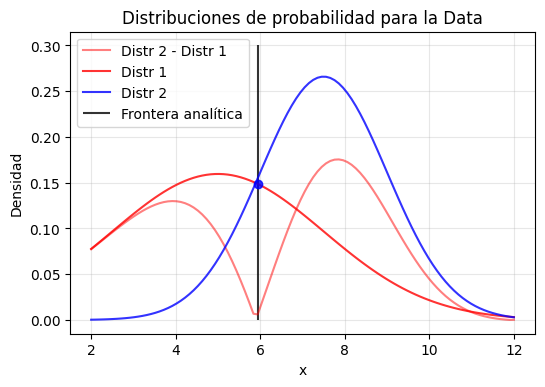

In [251]:
#x = np.linspace(-1, 12,1000)
_, f1, f2 = pdf(x, mean1 = 5, mean2 = 7.5, desv1 = 2.5, desv2 = 1.5)
plt.figure(dpi=100)
plt.plot(x,abs(f2.pdf(x)-f1.pdf(x)), "r-", alpha=0.5, label="Distr 2 - Distr 1")
xmin_=x[25+index_min]
plt.vlines(xmin_, 0, 0.3, alpha=0.8,label="Frontera analítica")
plt.plot(x, f1.pdf(x), color="red", label="Distr 1", alpha=0.8)
plt.plot(x, f2.pdf(x), color="blue", label="Distr 2",alpha=0.8)
#plt.ylim(0,0.2)
plt.legend()
plt.title(f"Distribuciones de probabilidad para la Data")
plt.xlabel('x')
plt.ylabel('Densidad')
plt.grid(alpha=0.3)
#plt.plot(x, f1.cdf(x))
#plt.plot(xmin_, f1.cdf(xmin_),"ro", alpha=0.8)

#plt.plot(x,f2.cdf(x))
plt.plot(xmin_,f2.cdf(xmin_),"bo", alpha=0.8)

##Data de entrenamiento

Teniendo estas distribuiciones listas, procederemos a tomar 100 muestras aleatorias para cada distribución

In [228]:
def mediadelamuestra(poblacion, muestra_size, n_muestras):
  muestra_medias = []
  for i in range(n_muestras):
    muestra = np.random.choice(poblacion, size=muestra_size, replace=False)
    muestra_media = stat.mean(muestra)
    muestra_medias.append(muestra_media)
  return muestra

Text(0, 0.5, 'Densidad')

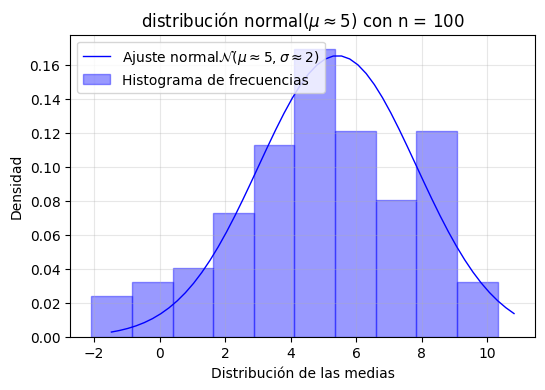

In [229]:
n=100
plt.figure(dpi=100)
plt.grid(alpha=0.3) 
plt.hist(mediadelamuestra(x_1,100,n),10,color="blue", alpha=0.4, ec="blue",label="Histograma de frecuencias", density=True) #Histograma de frecuencias
std = np.std(mediadelamuestra(x_1,100,n), ddof=1) #Desviación estandar
mean = np.mean(mediadelamuestra(x_1,100,n)) #Media 
domain = np.linspace(np.min(mediadelamuestra(x_1,100,n)),np.max(mediadelamuestra(x_1,100,n))) #Dominio 
plt.plot(domain,stats.norm.pdf(domain,mean,std),lw=1,color="blue",
         label="Ajuste normal" +'$\mathcal{N}$' + f'$( \mu \\approx{round(mean)} , \sigma \\approx{round(std)})$') #Ajuste normal al 1 experimento
plt.legend()
mediadeladistr = stat.mean(x_1)
plt.title(f"distribución normal($ \mu \\approx{round(mediadeladistr)})$ con n = {n}")
plt.xlabel('Distribución de las medias')
plt.ylabel('Densidad')

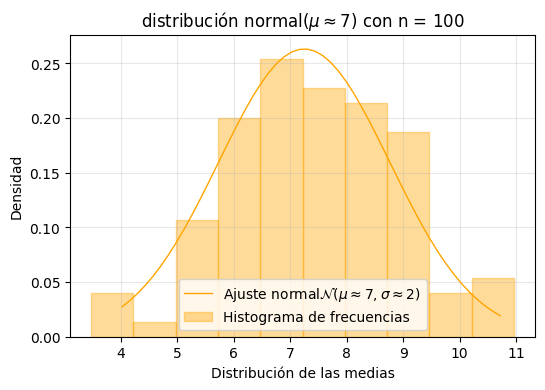

In [230]:
n=100
plt.figure(dpi=100)
plt.hist(mediadelamuestra(x_2,100,n),10,color="orange", alpha=0.4, ec="orange",label="Histograma de frecuencias", density=True) #Histograma de frecuencias
std1 = np.std(mediadelamuestra(x_2,100,n), ddof=1) #Desviación estandar
mean1 = np.mean(mediadelamuestra(x_2,100,n)) #Media 
domain1 = np.linspace(np.min(mediadelamuestra(x_2,100,n)),np.max(mediadelamuestra(x_2,100,n))) #Dominio 
plt.plot(domain1,stats.norm.pdf(domain1,mean1,std1),lw=1,color="orange",
         label="Ajuste normal" +'$\mathcal{N}$' + f'$( \mu \\approx{round(mean1)} , \sigma \\approx{round(std1)})$') #Ajuste normal al 1 experimento
plt.legend()
mediadeladistr = stat.mean(x_2)
plt.title(f"distribución normal($ \mu \\approx{round(mediadeladistr)})$ con n = {n}")
plt.xlabel('Distribución de las medias')
plt.ylabel('Densidad')
plt.grid(alpha=0.3) 

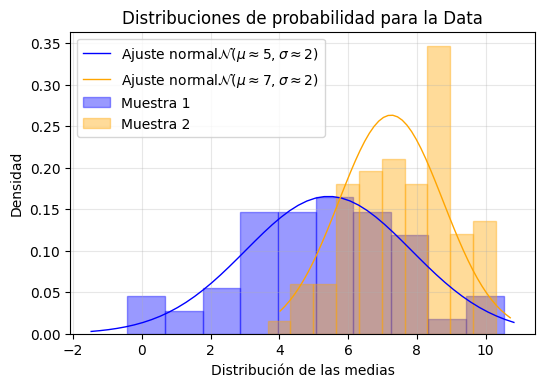

In [231]:
plt.figure(dpi=100)
r1 = mediadelamuestra(x_1,100,n)
r2 = mediadelamuestra(x_2,100,n)
plt.hist(r1,10,color="blue", alpha=0.4, ec="blue",label="Muestra 1", density=True)
plt.hist(r2,10,color="orange", alpha=0.4, ec="orange",label="Muestra 2", density=True) #Histograma de frecuencias

plt.plot(domain,stats.norm.pdf(domain,mean,std),lw=1,color="blue",
         label="Ajuste normal" +'$\mathcal{N}$' + f'$( \mu \\approx{round(mean)} , \sigma \\approx{round(std)})$') #Ajuste normal al 1 experimento
plt.plot(domain1,stats.norm.pdf(domain1,mean1,std1),lw=1,color="orange",
         label="Ajuste normal" +'$\mathcal{N}$' + f'$( \mu \\approx{round(mean1)} , \sigma \\approx{round(std1)})$') #Ajuste normal al 1 experimento
plt.legend()
plt.title(f"Distribuciones de probabilidad para la Data")
plt.xlabel('Distribución de las medias')
plt.ylabel('Densidad')
plt.grid(alpha=0.3) 

In [11]:
X = np.zeros(200)
Y = np.zeros(200)
Y[100:200] = np.ones(100)

X[0:100] = r1
X[100:200] = r2

dicc = {"Y(labels)":Y,"X_1(feature)":X}
df = pd.DataFrame(dicc)

In [12]:
df

,Y(labels),X_1(feature)
0,0.0,9.624817
1,0.0,7.833530
2,0.0,6.961158
3,0.0,7.177685
4,0.0,3.056026
...,...,...
195,1.0,10.999656
196,1.0,5.442774
197,1.0,8.314339
198,1.0,7.580907


##Datos de test

In [41]:
r1_test = mediadelamuestra(x_1,25,n)
r2_test = mediadelamuestra(x_2,25,n)

X = np.zeros(50)
Y = np.zeros(50)
Y[25:50] = np.ones(25)

X[0:25] = r1_test
X[25:50] = r2_test

dicc = {"Y(labels)":Y,"X_1(feature)":X}
df_test = pd.DataFrame(dicc)
df_test.head()

,Y(labels),X_1(feature)
0,0.0,6.404298
1,0.0,6.415058
2,0.0,6.023301
3,0.0,1.380073
4,0.0,4.241784


#**Modelos de machine- learning**


#**Regresión lineal**

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [42]:
X_train = df[['X_1(feature)']]
y_train = df["Y(labels)"]
X_test  = df_test[['X_1(feature)']]
y_test  = df_test["Y(labels)"]

In [145]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [146]:
score = clf.score(X_train, y_train)
score1 = clf.score(X_test, y_test)
print("El score de los datos de entrenamiento usando regresión lineal es",score)
print("El score de los datos de test usando regresión lineal es",score1)

El score de los datos de entrenamiento usando regresión lineal es 0.2936879251485476
El score de los datos de test usando regresión lineal es 0.4190475421599015


## Curvas de validación

In [147]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [148]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
    ):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)

    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")

    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


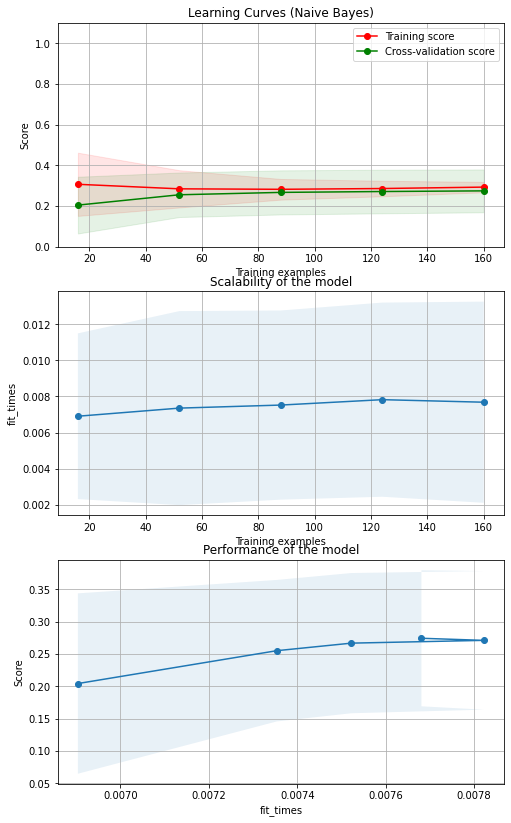

In [149]:
fig, axes = plt.subplots(3, 1, figsize=(8, 14))
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#clf = SVC(gamma = 20.0)
#clf.fit(X_t, y)
plot_learning_curve(clf, title, X_train, y_train, axes=axes[0:,], ylim=(0, 1.1), cv=cv, n_jobs=4)
plt.show()

\\
#**Decision Tree Classifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf = DecisionTreeClassifier()

## Grid search para encontrar los mejores parámetros

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10,50, 100,300, 500,700], 'max_depth' : [4,5,6,7,8]}
param_test1 = {'max_depth' : range(1,7,1)}

In [73]:
gsearch2 = GridSearchCV(estimator=dt_clf, 
                        param_grid = param_test1, 
                        scoring='r2', 
                        cv=5)

In [74]:
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 7)}, scoring='r2')

##Mejor estimador

In [75]:
gsearch2.best_estimator_

DecisionTreeClassifier(max_depth=1)

##Resultados

El train score es:0.78 
El test score es:0.77


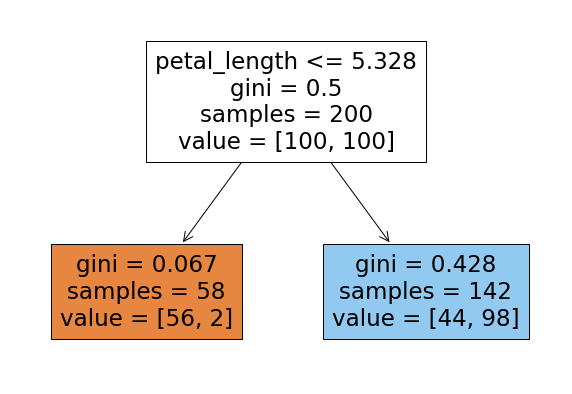

In [77]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=1).fit(X_train, y_train)

print(f"El train score es:{dt_clf.score(X_test, y_test)} ")
print(f"El test score es:{dt_clf.score(X_train, y_train)}" )

plt.figure(figsize=(10,7))
plot_tree(dt_clf, feature_names=['petal_length' ,'petal_width'],filled=True);

##Matriz de confusión

In [161]:
dt_pred = dt_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

def cm(y_true, y_pred):
  return plot_confusion_matrix(confusion_matrix(y_true, y_pred),cmap='Reds')

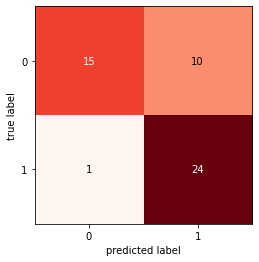

In [162]:
cm(y_test, dt_pred);

##Frontera de clasificación

([], <a list of 0 Text major ticklabel objects>)

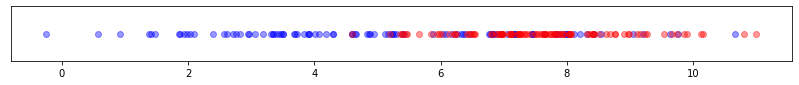

In [107]:
#De forma grafica puede ser entendido asi:
m=100
plt.figure(figsize=(14,1))
plt.plot(X_train[y_train==0],np.zeros(m),"bo", alpha=0.4)
plt.plot(X_train[y_train==1],np.zeros(m),"ro", alpha=0.4)
plt.yticks([])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


(-0.0001, 0.0003)

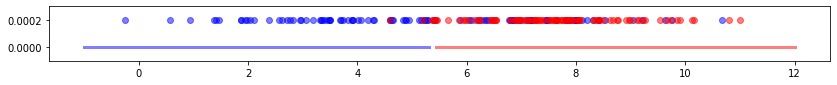

In [110]:
# dado un nuevo conjunto de puntos, ¿que puede estimar el algoritmo?
Xr = np.linspace(-1, 12, 100).reshape(-1,1)   # Para un nuevo conjunto de datos, tentemos que  la prediccion es:
yr = dt_clf.predict(Xr) 
plt.figure(figsize=(14,1))
plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ),color="b" ,alpha=0.5, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="r",alpha=0.5, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
plt.plot(X_train[y_train==0],0.0002*np.ones(m),"bo", alpha = 0.5) # Valores aleatorios # Valores de entrenamiento
plt.plot(X_train[y_train==1],0.0002*np.ones(m),"ro", alpha = 0.5)
plt.ylim((-0.0001,0.0003))

##Curvas de validación

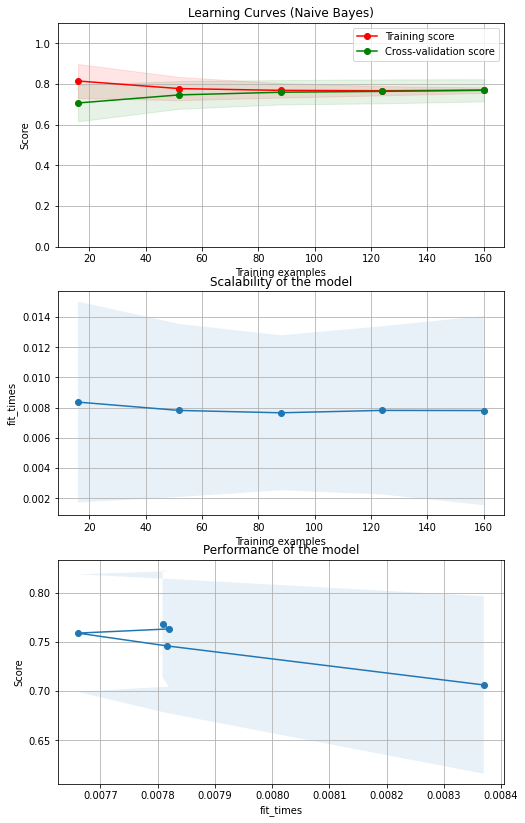

In [150]:
fig, axes = plt.subplots(3, 1, figsize=(8, 14))
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#clf = SVC(gamma = 20.0)
#clf.fit(X_t, y)
plot_learning_curve(dt_clf, title, X_train, y_train, axes=axes[0:,], ylim=(0, 1.1), cv=cv, n_jobs=4)
plt.show()

\\
#**Support Vector Machine(SVM)**

In [155]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [198]:
svm_clf = SVC(kernel="linear")

##Grid search para encontrar los mejores parametros

In [199]:
cs = np.linspace(0,1,200)
param_test1 = {'C' : cs}

In [200]:
gsearch2 = GridSearchCV(estimator=svm_clf, 
                        param_grid = param_test1, 
                        scoring='r2', 
                        cv=5)

In [201]:
gsearch2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 1

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
       0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
       0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
       0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
       0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
       0.12562814, 0...
       0.82914573, 0.83417085, 0.83919598, 0.84422111, 0.84924623,
       0.85427136, 0.85929648, 0.86432161, 0.86934673, 0.87437186,
       0.87939698, 0.88442211, 0.88944724, 0.89447236, 0.89949749,
       0.90452261, 0.90954774, 0.91457286, 0.91959799, 0.92462312,
       0.92964824, 0.93467337, 0.93969849, 0.94472362, 0.94974874,
       0.95477387, 0.95979899, 0.96482412, 0.96984925, 0.97487437,
       0.9798995 , 0.98492462, 0.98994975, 0.99497487, 1.        ])},
             scoring='r2')

##Mejor estimador

In [202]:
gsearch2.best_estimator_

SVC(C=0.005025125628140704, kernel='linear')

##Resultados

In [203]:
svm_clf = SVC(kernel="linear", C=0.005025125628140704).fit(X_train, y_train)

print(f"El train score es:{dt_clf.score(X_test, y_test)} ")
print(f"El test score es:{dt_clf.score(X_train, y_train)}" )

El train score es:0.78 
El test score es:0.77


##Matriz de confusión

In [204]:
svm_pred = svm_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

def cm(y_true, y_pred):
  return plot_confusion_matrix(confusion_matrix(y_true, y_pred),cmap='Reds')

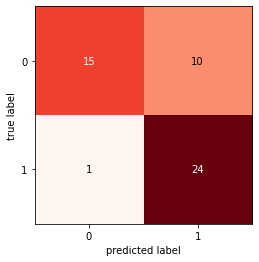

In [205]:
cm(y_test, svm_pred);

##Frontera de clasificación

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(-0.0001, 0.0003)

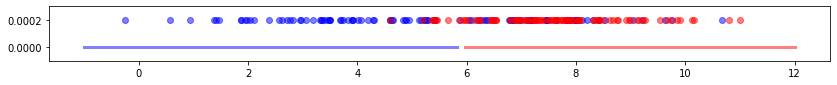

In [196]:
# dado un nuevo conjunto de puntos, ¿que puede estimar el algoritmo?
Xr = np.linspace(-1, 12, 100).reshape(-1,1)   # Para un nuevo conjunto de datos, tentemos que  la prediccion es:
yr = svm_clf.predict(Xr) 
plt.figure(figsize=(14,1))
plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ),color="b" ,alpha=0.5, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="r",alpha=0.5, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
plt.plot(X_train[y_train==0],0.0002*np.ones(m),"bo", alpha = 0.5) # Valores aleatorios # Valores de entrenamiento
plt.plot(X_train[y_train==1],0.0002*np.ones(m),"ro", alpha = 0.5)
plt.ylim((-0.0001,0.0003))

##Curvas de validación

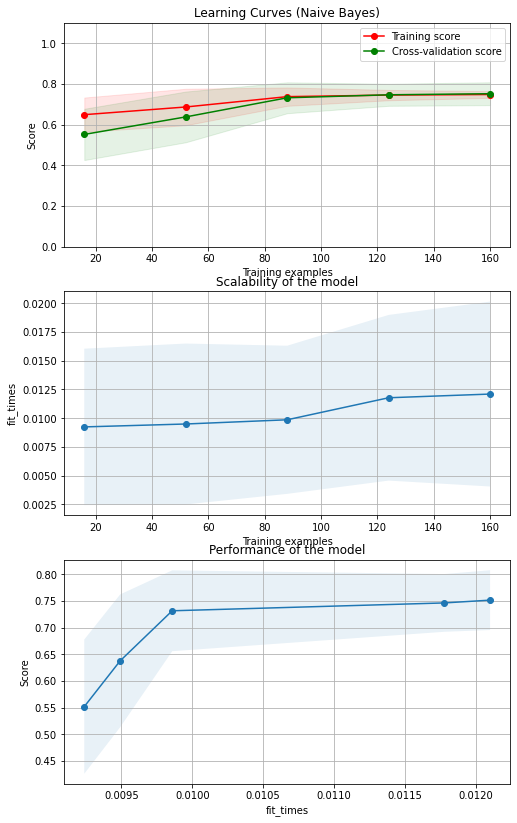

In [197]:
fig, axes = plt.subplots(3, 1, figsize=(8, 14))
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#clf = SVC(gamma = 20.0)
#clf.fit(X_t, y)
plot_learning_curve(svm_clf, title, X_train, y_train, axes=axes[0:,], ylim=(0, 1.1), cv=cv, n_jobs=4)
plt.show()

#Conclusión

Como se puede observar tanto *DecisionTreeClassifier* como *SVM* generan una mejor clasificación que la regresión lineal, sin embargo entre los ajustes generados por estos modelos no hay diferencia alguna, obteniendo en cada una los mismo scores y matriz de confusión, por ende debemos tener la misma frontera de clasificación. Usando grid search obtuvimos los mejores parámetros para cada modelo, por tanto, el mejor que podemos obtener en esta clasificación será de 0.77

#**Curvas de aprendizaje para diferentes valores**

In [270]:
def curvas(datos,datos_test,media1,media2,std1,std2):
  n=100
  x_1 = stats.norm.rvs(loc=media1, scale=std1, size=1000, random_state=None)
  x_2 = stats.norm.rvs(loc=media2, scale=std2, size=1000, random_state=None)

  r1 = mediadelamuestra(x_1,datos//2,n)
  r2 = mediadelamuestra(x_2,datos//2,n)

  X = np.zeros(datos)
  Y = np.zeros(datos)
  Y[datos//2:datos] = np.ones(datos//2)

  X[0:datos//2] = r1
  X[datos//2:datos] = r2

  dicc = {"Y(labels)":Y,"X_1(feature)":X}
  df = pd.DataFrame(dicc)

  r1_test = mediadelamuestra(x_1,datos_test//2,n)
  r2_test = mediadelamuestra(x_2,datos_test//2,n)

  X = np.zeros(datos_test)
  Y = np.zeros(datos_test)
  Y[datos_test//2:datos_test] = np.ones(datos_test//2)

  X[0:datos_test//2] = r1_test
  X[datos_test//2:datos_test] = r2_test

  dicc = {"Y(labels)":Y,"X_1(feature)":X}
  df_test = pd.DataFrame(dicc)

  X_train = df[['X_1(feature)']]
  y_train = df["Y(labels)"]
  X_test  = df_test[['X_1(feature)']]
  y_test  = df_test["Y(labels)"]

  clf = LinearRegression()
  clf.fit(X_train, y_train)

  fig, axes = plt.subplots(3, 1, figsize=(8, 14))
  title = "Learning Curves (Naive Bayes)"
  # Cross validation with 100 iterations to get smoother mean test and train
  # score curves, each time with 20% data randomly selected as a validation set.
  cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
  #clf = SVC(gamma = 20.0)
  #clf.fit(X_t, y)
  plot_learning_curve(clf, title, X_train, y_train, axes=axes[0:,], ylim=(0, 1.1), cv=cv, n_jobs=4)
  plt.show()

  return plt

##Datos de entrenamiento 30. media1=7.5, media2=10, desv1=1, desv1=1

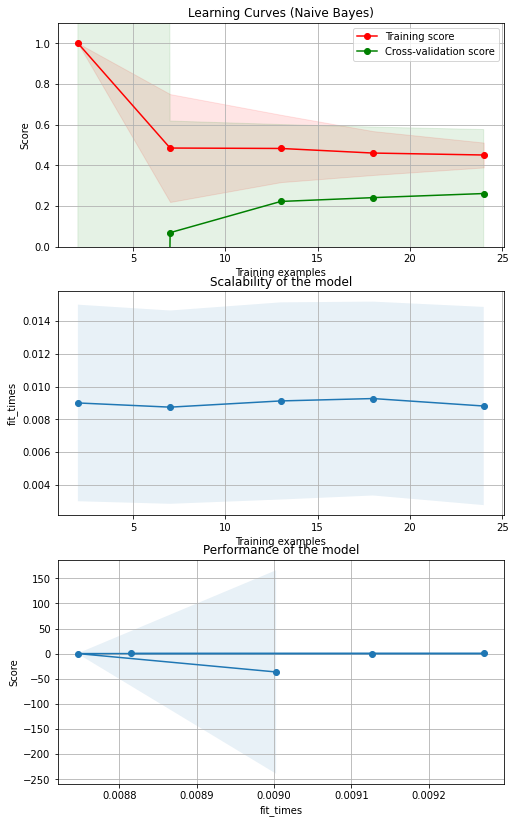

<module 'matplotlib.pylab' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pylab.py'>

In [274]:
curvas(30,10,7.5, 10 ,1,1)

##Datos de entrenamiento 100. media1=7.5, media2=10, desv1=1, desv1=1

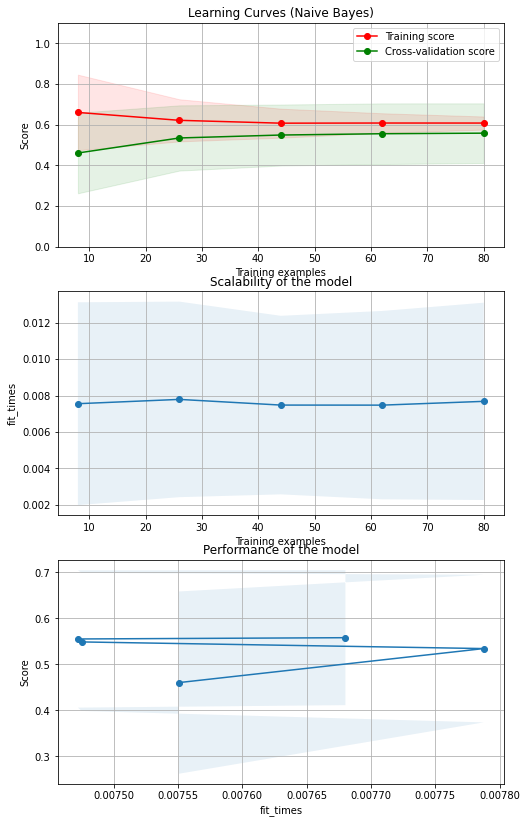

<module 'matplotlib.pylab' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pylab.py'>

In [275]:
curvas(100,30,7.5, 10 ,1,1)

Como podemos observar el modelo se comporta mucho mejor cuando tener más datos de entrenamiento

##Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 2, desv1 = 2

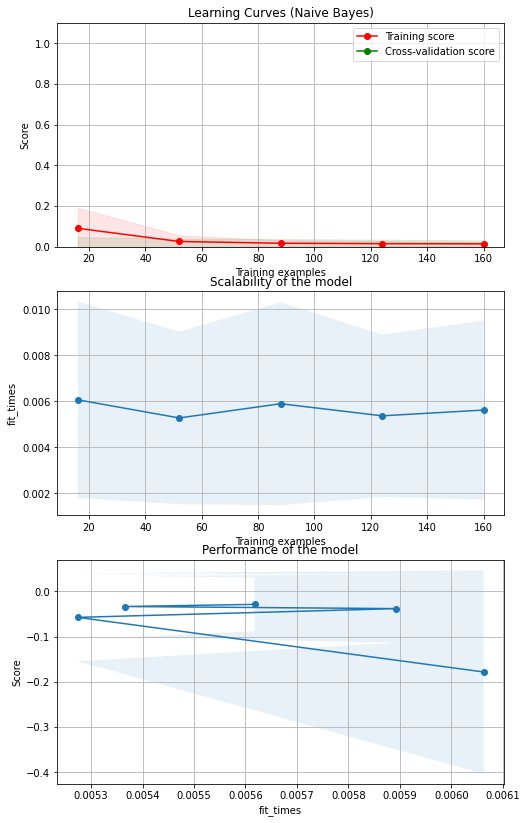

<module 'matplotlib.pylab' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pylab.py'>

In [278]:
curvas(200,50,7.5, 7 ,2,2)

##Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 0.5, desv1 = 0.5

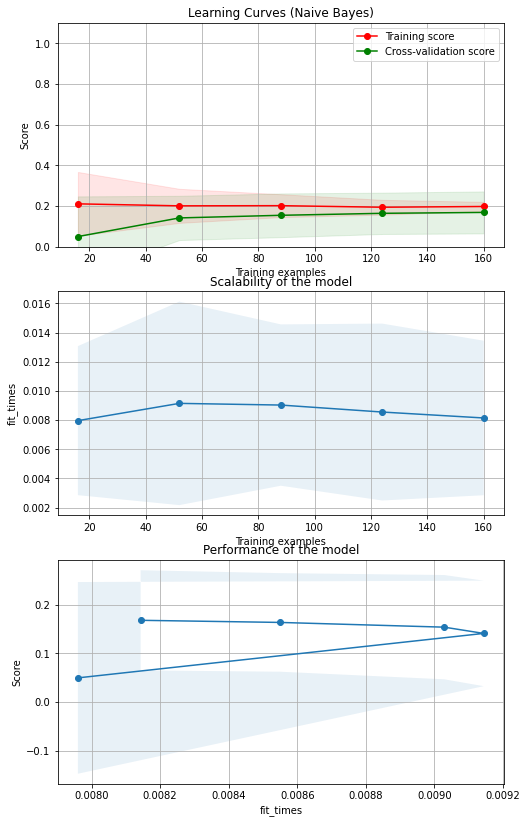

<module 'matplotlib.pylab' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pylab.py'>

In [277]:
curvas(200,50,7.5, 7 ,0.5,0.5)

En estos últimos 2 conjuntos de datos aumentamos el número de datos, sin embargo el modelo se comporta peor, esto es debido a que estamos haciendo un problema de clasificación con 2 muestras muy cercanas, se podría decir que estan en posiciones superpuestas, donde en el primero observamos desviaciones estandar más grandes, lo que quiere decir que los datos se encuentran más dispersos. Este tipo de problemas de clasificación donde las medias están tan cercanas y tenemos desviaciones estandar grandes requieren modelos más precisos, bien sea *DecisionTreeClassifier*, *SVM*, *RandomForestClassifier*, etc, modelos diseñados para este tipo de problemas. Esto solo muestra la impresición de los modelos cuando intetamos realizar problemas complejos de clasificación con regresión lineal